In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
data = pd.read_csv('data.csv')

In [3]:
data.columns=['Feature1', 'Feature2','Label']

In [4]:
# Part A: Logistic Regression with Scikit-learn
X = data[['Feature1', 'Feature2']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalizing the dataset.
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

In [6]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Plot data points and decision boundary
def plot_decision_boundary(X, y, model):
    plt.scatter(X[y == 0]['Feature1'], X[y == 0]['Feature2'], color='blue', label='Class 0')
    plt.scatter(X[y == 1]['Feature1'], X[y == 1]['Feature2'], color='red', label='Class 1')

    # Plot decision boundary
    x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
    y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

C:\ProgramData\anaconda3\envs\tf_new\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


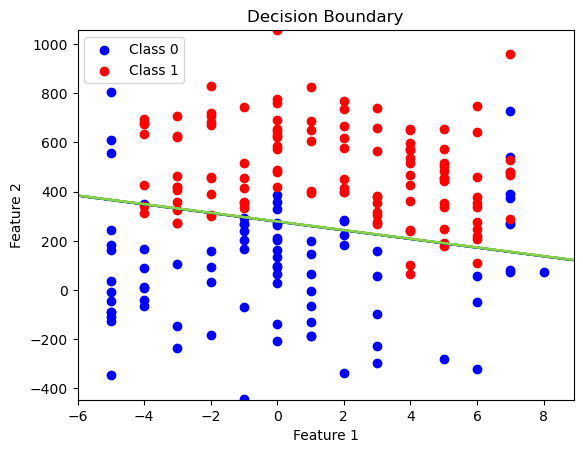

In [8]:
plot_decision_boundary(X, y, model)

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model (with scikit-learn):", accuracy)

Accuracy of logistic regression model (with scikit-learn): 0.9


In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Classification Report:\n', classification_report(y_test, y_pred))

[[10  3]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.90      0.96      0.93        27

    accuracy                           0.90        40
   macro avg       0.90      0.87      0.88        40
weighted avg       0.90      0.90      0.90        40



In [11]:
# Part B: Logistic Regression Without Scikit-learn
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (1/(2*m)) * np.sum(np.square(h - y))
    return cost

In [13]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    loss = []

    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = 1 / m * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        loss.append(cost)

    return theta, loss

In [14]:
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_train_b = y_train.values.reshape(-1, 1)
theta = np.zeros((X_train_b.shape[1], 1))
alpha = 0.01
iterations = 1000

theta, loss = gradient_descent(X_train_b, y_train_b, theta, alpha, iterations)

C:\Users\cvish\AppData\Local\Temp\ipykernel_15476\4091633217.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


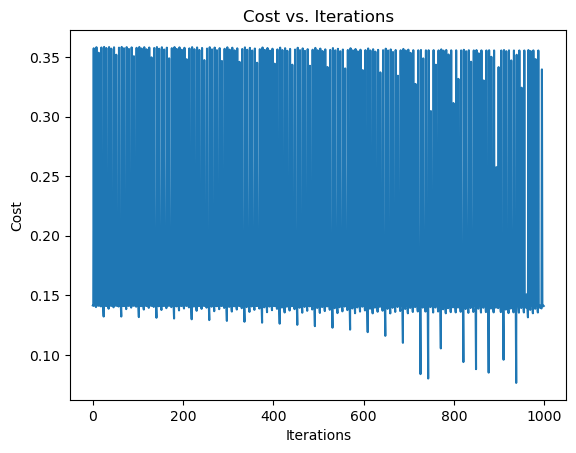

In [15]:
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

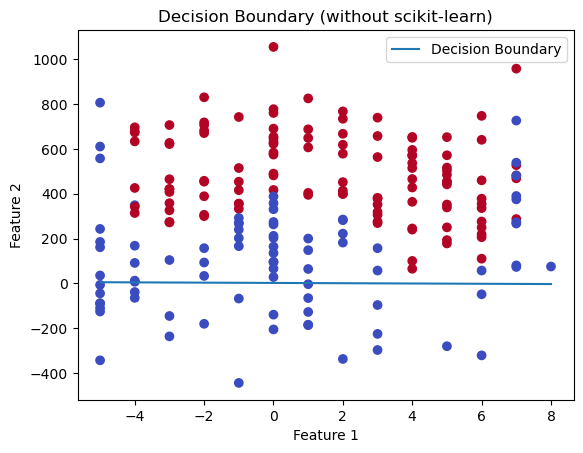

In [16]:
# Plot decision boundary
plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap=plt.cm.coolwarm)
x_values = np.linspace(np.min(X['Feature1']), np.max(X['Feature1']), 100)
theta_reshaped = theta.reshape(-1)
y_values = - (theta_reshaped[0] + theta_reshaped[1] * x_values) / theta_reshaped[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (without scikit-learn)')
plt.legend()
plt.show()

In [17]:
# Evaluate the model
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred_b = np.round(sigmoid(X_test_b.dot(theta)))
accuracy_b = accuracy_score(y_test, y_pred_b)
print("Accuracy of logistic regression model (without scikit-learn):", accuracy_b)

Accuracy of logistic regression model (without scikit-learn): 0.75


In [18]:
# Part C: Logistic Regression with Feature Engineering (Scikit-learn)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [19]:
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [20]:
model_poly = LogisticRegression()

In [21]:
model_poly.fit(X_train_poly, y_train)

LogisticRegression()

In [22]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')

    # Generate mesh grid for decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()
plot_decision_boundary(X_poly[:, 1:], y, model_poly)

In [23]:
# Evaluate the model
y_pred_poly = model_poly.predict(X_test_poly)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy of logistic regression model with feature engineering (with scikit-learn):", accuracy_poly)

Accuracy of logistic regression model with feature engineering (with scikit-learn): 0.825


In [24]:
# Part D: Logistic Regression with Feature Engineering (Without Scikit-learn)
theta_poly = np.zeros((X_train_poly.shape[1], 1))
theta_poly, cost_history_poly = gradient_descent(X_train_poly, y_train_b, theta_poly, alpha, iterations)

C:\Users\cvish\AppData\Local\Temp\ipykernel_15476\4091633217.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


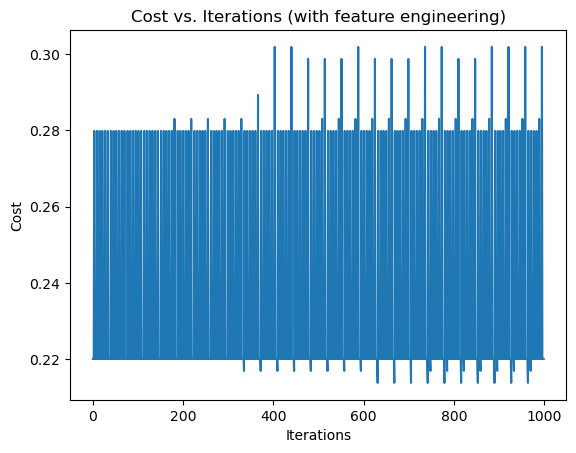

In [25]:
plt.plot(cost_history_poly)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations (with feature engineering)')
plt.show()

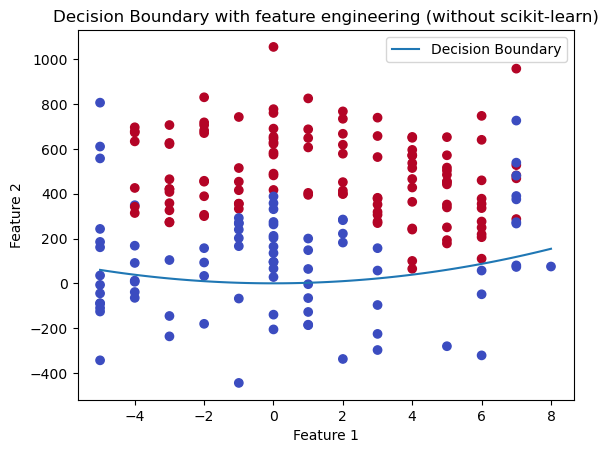

In [26]:
# Plot decision boundary
plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap=plt.cm.coolwarm)
x_values = np.linspace(np.min(X['Feature1']), np.max(X['Feature1']), 100)
theta_reshaped = theta_poly.reshape(-1)
y_values = -(theta_reshaped[0] + theta_reshaped[1] * x_values + theta_reshaped[2] * x_values ** 2) / theta_reshaped[3]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with feature engineering (without scikit-learn)')
plt.legend()
plt.show()


In [27]:
# Perform the dot product
y_pred_poly_b = np.round(sigmoid(X_test_poly.dot(theta_poly)))

# Calculate accuracy
accuracy_poly_b = accuracy_score(y_test, y_pred_poly_b)
print("Accuracy of logistic regression model with feature engineering (without scikit-learn):", accuracy_poly_b)


Accuracy of logistic regression model with feature engineering (without scikit-learn): 0.675


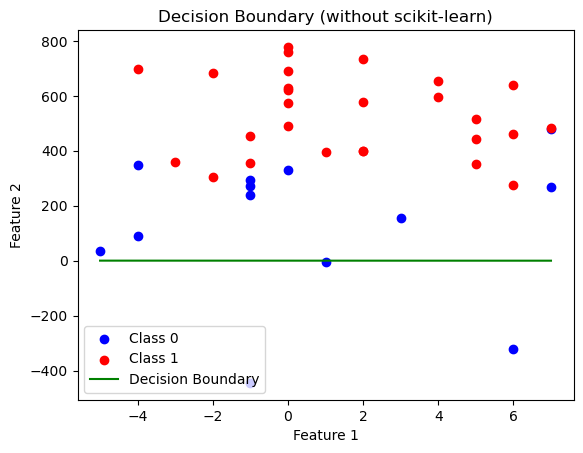

In [28]:
def plot_decision_boundary(X, y, theta):
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='red', label='Class 1')

    # Plot decision boundary
    x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    y_values = -(theta[0] + theta[1]*x_values) / theta[2]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (without scikit-learn)')
    plt.legend()
    plt.show()

# Assuming theta_poly is the learned parameters from your logistic regression model
plot_decision_boundary(X_test_poly, y_test, theta_poly)